<a href="https://colab.research.google.com/github/romenlongcode/YT-PYtorch/blob/main/irisclassier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn  as nn
import torch.nn.functional as F
import pandas as pd

In [5]:
#neural network definition
class Model(nn.Module):
  #input (4 features off a flower)->>
  #hidden layer1 H1(number of neurons)->>
  #hidden layer2 H2(N)->>
  #OUTPUT(3 Classes of iris)

  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.Module)
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [6]:
#pick a manual seed for randomization
torch.manual_seed(41)
model=Model()

In [7]:
#lloading dataset
url= "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df=pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


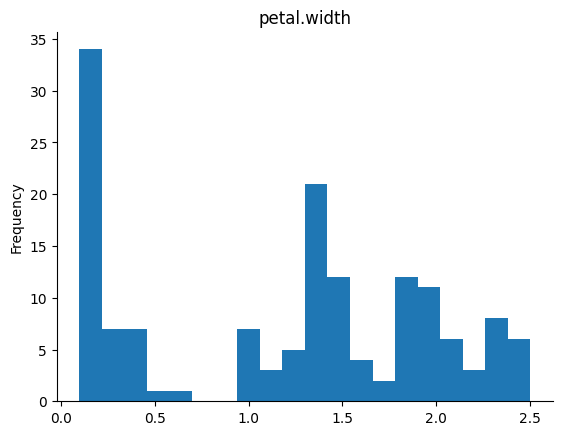

In [8]:
# @title petal.width

from matplotlib import pyplot as plt
my_df['petal.width'].plot(kind='hist', bins=20, title='petal.width')
plt.gca().spines[['top', 'right',]].set_visible(False)

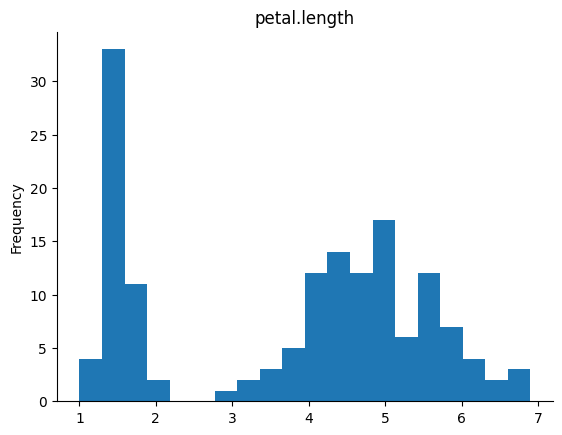

In [9]:
# @title petal.length

from matplotlib import pyplot as plt
my_df['petal.length'].plot(kind='hist', bins=20, title='petal.length')
plt.gca().spines[['top', 'right',]].set_visible(False)

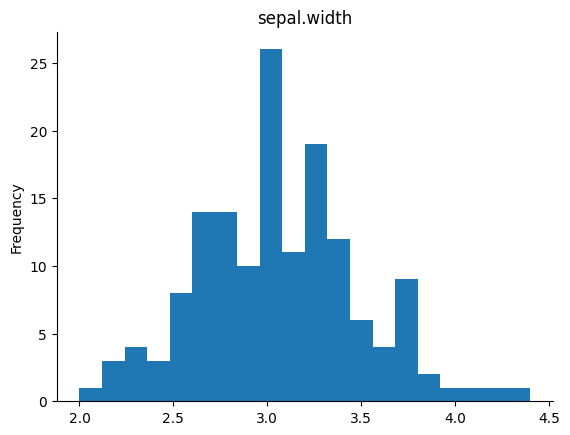

In [10]:
# @title sepal.width

from matplotlib import pyplot as plt
my_df['sepal.width'].plot(kind='hist', bins=20, title='sepal.width')
plt.gca().spines[['top', 'right',]].set_visible(False)

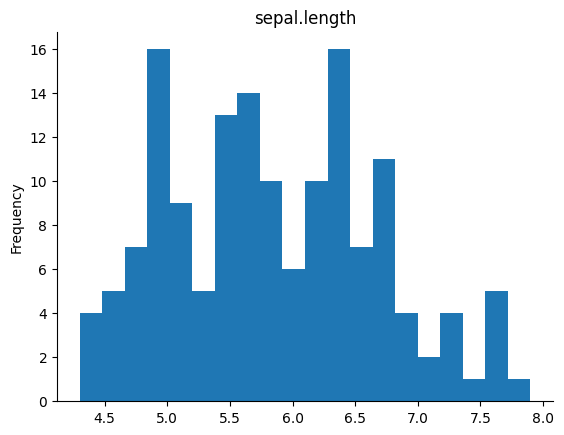

In [11]:
# @title sepal.length

from matplotlib import pyplot as plt
my_df['sepal.length'].plot(kind='hist', bins=20, title='sepal.length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [14]:
#Change last column from Strings to integers as the machine does not accept alphabets to strings but only number floats

my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)

In [15]:
my_df.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [16]:
my_df.tail(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
130,7.4,2.8,6.1,1.9,2.0
131,7.9,3.8,6.4,2.0,2.0
132,6.4,2.8,5.6,2.2,2.0
133,6.3,2.8,5.1,1.5,2.0
134,6.1,2.6,5.6,1.4,2.0
135,7.7,3.0,6.1,2.3,2.0
136,6.3,3.4,5.6,2.4,2.0
137,6.4,3.1,5.5,1.8,2.0
138,6.0,3.0,4.8,1.8,2.0
139,6.9,3.1,5.4,2.1,2.0


In [17]:
#define X,y
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
#convert X_features into float tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)

In [20]:
#convert y_labels into long tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test.values)

In [21]:
#SET THE CRITERION OF MODEL TO MEASURE THE ERROR , HOW FAR OFF THE PREDICTIONS ARE FROM THE DATA
criterion=nn.CrossEntropyLoss()


In [25]:
#CHOOSE ADAM OPTIMIZER LR=0.01(IF ERROR DOESN'T GO DOWN AFTER A BUNCH OF ITERATION (EPOCHS) , WE PROBABLY LOWER OUR LEARNING RATE)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [26]:
#if we want to see our parameters
model.parameters()

<generator object Module.parameters at 0x79d1fe98c510>

In [27]:
#TRAIN
#epoch(one run through all the training data in our network)
epoch=100
losses=[]
for i in range(epoch):
  #go forward and get a prediction
  y_pred=model.forward(X_train) #to get the predicted results
  #measure loss/error, gonna be high at first
  loss=criterion(y_pred, y_train) #predicted values vs  y_train
  #keep track of our losses
  losses.append(loss.detach().numpy())
  #print the resuls for every 10 epochs
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')

  #do some back propagation : take the error of forward propagationand feed it back to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:1.1253553628921509
Epoch:10 and loss:1.0189670324325562
Epoch:20 and loss:0.8335332274436951
Epoch:30 and loss:0.601472795009613
Epoch:40 and loss:0.4118161201477051
Epoch:50 and loss:0.2799775004386902
Epoch:60 and loss:0.19088388979434967
Epoch:70 and loss:0.13471204042434692
Epoch:80 and loss:0.10107709467411041
Epoch:90 and loss:0.08242978900671005


Text(0.5, 0, 'Epoch')

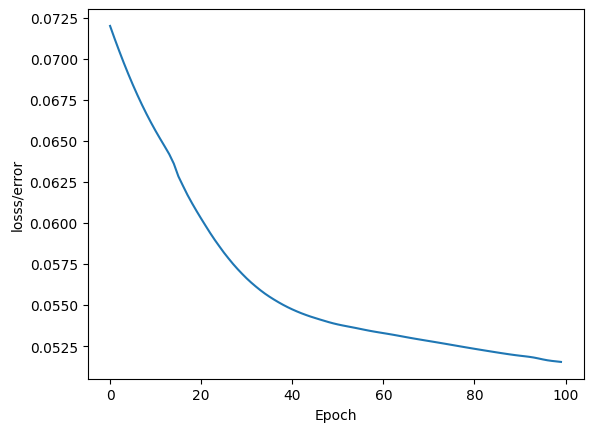

In [30]:
#plot the error loss
plt.plot(range(epoch),losses)
plt.ylabel("losss/error")
plt.xlabel("Epoch")

In [36]:
loss

tensor(0.0515, grad_fn=<NllLossBackward0>)

In [41]:
#EVALUATE OUR MODEL ON TEST DATASET
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_eval=model.forward(data)
    if y_test[i]==0:
     X="Setosa"
    elif y_test[i]==1:
     X="Versicolor"
    else:
      X="Virginica"
   #will tell us what kind of flower  class our network thinks it is
    print(f'{i+1}. {str(y_eval)} \t {y_test[i]} \t {y_eval.argmax().item()}')

    if y_eval.argmax().item()==y_test[i] :
      correct+=1
    print(f'We got {correct}correct .')

1. tensor([-4.0244,  6.7311,  0.2924]) 	 1 	 1
We got 1correct .
2. tensor([  9.8479,  -0.1797, -14.4159]) 	 0 	 0
We got 2correct .
3. tensor([-12.7707,   2.4951,  19.4058]) 	 2 	 2
We got 3correct .
4. tensor([-4.5468,  6.4079,  1.5061]) 	 1 	 1
We got 4correct .
5. tensor([-4.8585,  7.1339,  1.1790]) 	 1 	 1
We got 5correct .
6. tensor([  9.0163,   0.1321, -13.4418]) 	 0 	 0
We got 6correct .
7. tensor([-1.7334,  6.5554, -3.3612]) 	 1 	 1
We got 7correct .
8. tensor([-8.4764,  5.1028,  9.4239]) 	 2 	 2
We got 8correct .
9. tensor([-5.8603,  5.6424,  4.5189]) 	 1 	 1
We got 9correct .
10. tensor([-2.4570,  7.0329, -2.7279]) 	 1 	 1
We got 10correct .
11. tensor([-7.2170,  5.3494,  7.0976]) 	 2 	 2
We got 11correct .
12. tensor([  9.2660,  -0.3286, -13.2616]) 	 0 	 0
We got 12correct .
13. tensor([ 10.4482,  -0.5929, -14.8755]) 	 0 	 0
We got 13correct .
14. tensor([  9.2813,  -0.2927, -13.3333]) 	 0 	 0
We got 14correct .
15. tensor([  9.9932,  -0.5149, -14.2245]) 	 0 	 0
We got 15co

In [42]:
#Load a new data

new_iris=torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
  print(model(new_iris))



new_iris=torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
  print(model(new_iris))


tensor([  9.4592,  -0.4451, -13.4309])
tensor([  9.4592,  -0.4451, -13.4309])


In [43]:
#save our nn model
torch.save(model.state_dict(),"my_iris_dataset_model.pt")

In [44]:
#load the save model
new_model=Model()
new_model.load_state_dict(torch.load("my_iris_dataset_model.pt"))

<All keys matched successfully>

In [45]:
#make sure it loaded correctly

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)